1. Consider a Cox-Ross-Rubinstein binomial tree model with the expected value of relative stock return $(S(t) - S(t-1))/S(t-1)$ equal to $0.02$, and variance equal to $0.0216$. Suppose the up factor is $u = 1.2$

    Compute the value of the down factor $d$

    We got that
    $E\left[\frac{S(t) - S(t-1)}{S(t-1)}\right] = 0.02$, $Var\left[\frac{S(t) - S(t-1)}{S(t-1)}\right] = 0.0216$ and $p_u = \frac{e^{r\Delta t} - d}{u - d}$

    Under the model of CRR we know that the distribution underlying random variable corresponds to a bernulli distribution so:
    $$
    E\left[\frac{S(t) - S(t-1)}{S(t-1)}\right] = p (u-1) + (1-p)(d-1)
    $$

    for any random variable 
    $$
        Var(X) = E[X^2] - E[X]^2
    $$

    therefor is easy to show that
    $$
        E\left[\left(\frac{S(t) - S(t-1)}{S(t-1)}\right)^2\right] = p (u-1)^2 + (1-p)(d-1)^2
    $$



in that way:

\begin{aligned}
    \text{Var}(X) &= E[X^2] - E[X]^2 \\
    &= p (u-1)^2 + (1-p)(d-1)^2 - \left( p (u-1) + (1-p)(d-1) \right)^2 \\
    &= p (u-1)^2 + (1-p)(d-1)^2 - \left( p^2 (u-1)^2 + 2p(u-1)(1-p)(d-1) + (1-p)^2(d-1)^2\right) \\
    &= p(u-1)^2 (1-p) + (1-p)(d-1)^2(1-(1-p)) - 2p(u-1)(1-p)(d-1) \\
    &= p(u-1)^2 (1-p) + p(1-p)(d-1)^2 - 2p(u-1)(1-p)(d-1) \\
    &= p(1-p) \left[(u-1)^2 -2(u-1)(d-1) +(d-1)^2\right] \\
    &= p(1-p) ((u-1) - (d-1))^2 \\
    &= p(1-p)(u-d)^2 
\end{aligned}

and 

\begin{aligned}
    E[X] &= p (u-1) + (1-p)(d-1) \\
    &= pu - p + d - 1 - pd + p \\
    &= p(u-d) +d-1   
\end{aligned}

Now we got an equation system to solve, and we are going to solve it with sympy


In [2]:
import sympy as sp 

d = sp.Symbol('d', real = True, positive = True)
u = 1.2

expected_return = 0.02
variance = 0.0216

p = (expected_return + 1 - d) / (u - d)

variance_expr = p * u**2 + (1-p) * d**2 - (expected_return + 1)**2

solution = sp.solve(variance_expr - variance, d)

solution



[0.900000000000000]

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

In [4]:
aapl_df = yf.download( 'AAPL',
                      start = '2020-01-01',
                      end = '2025-01-01'
    
)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

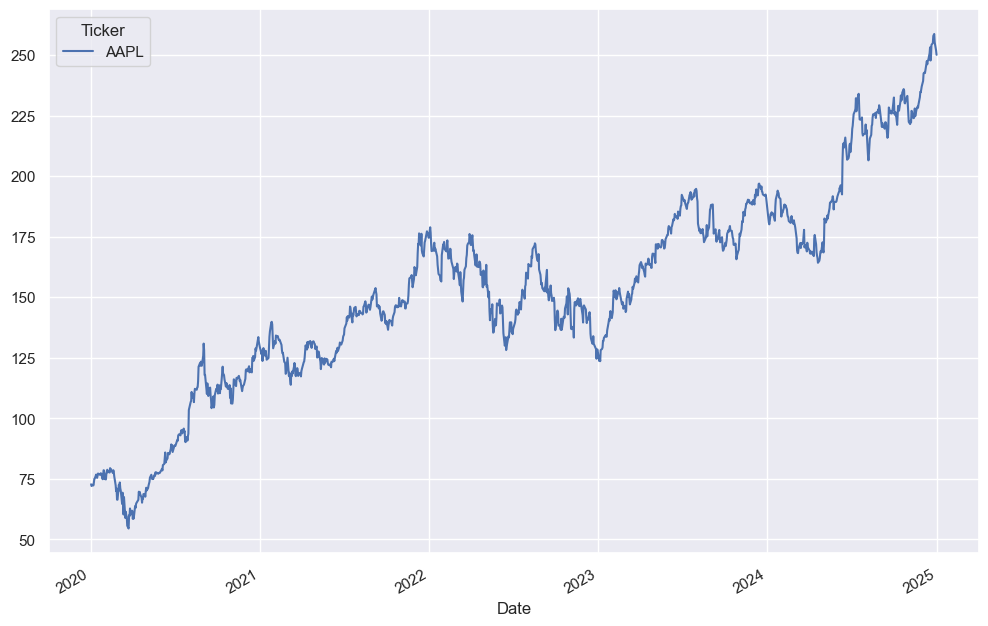

In [5]:
aapl_df['Close'].plot(kind = 'line', figsize = (12,8))

In [6]:
new_aapl = aapl_df['Close'].reset_index()
new_aapl['log_returns'] = np.log(new_aapl['AAPL'] / new_aapl['AAPL'].shift(1))
new_aapl.dropna(inplace= True)
new_aapl.set_index('Date', inplace = True)

<Axes: xlabel='Date'>

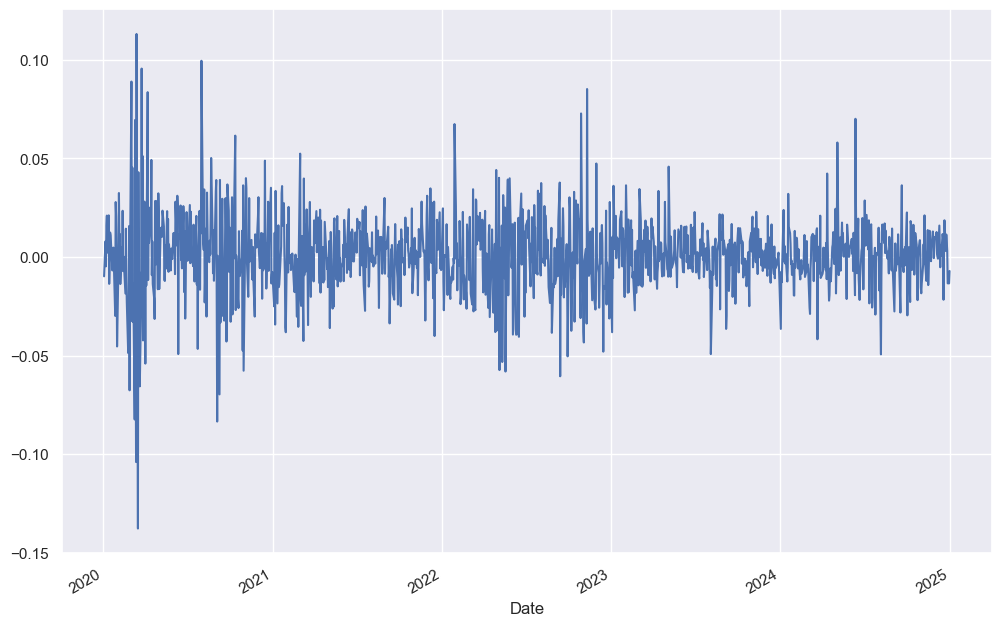

In [7]:
new_aapl['log_returns'].plot(kind = 'line', figsize=(12,8))

<Axes: ylabel='Frequency'>

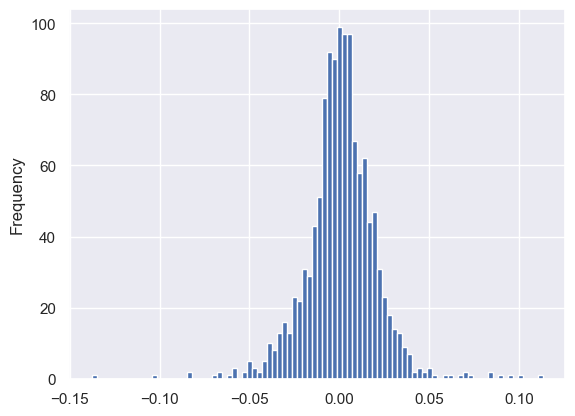

In [8]:
new_aapl['log_returns'].plot(kind = 'hist', bins = 90)

In [13]:
# Definir parámetros de la simulación
parameters_bm = {'mean': np.mean(new_aapl['log_returns']), 'std': np.std(new_aapl['log_returns'])}
ultimo_valor = new_aapl['AAPL'].iat[-1]

# Crear DataFrame para almacenar simulaciones
simulation = pd.DataFrame()

# Número de simulaciones y número de días
num_simulaciones = 50
num_dias = 200

for sim in range(num_simulaciones):
    aux_list = [ultimo_valor]  # Inicializar con el último valor disponible
    shocks = np.random.standard_normal(num_dias)

    for j in range(1, num_dias):  # Comenzar en 1 porque ya tenemos el valor inicial
        aux_list.append(aux_list[j - 1] * np.exp(parameters_bm['mean'] + parameters_bm['std'] * shocks[j]))

    simulation[f'sim_{sim + 1}'] = aux_list  # Guardar la simulación en el DataFrame

<Axes: >

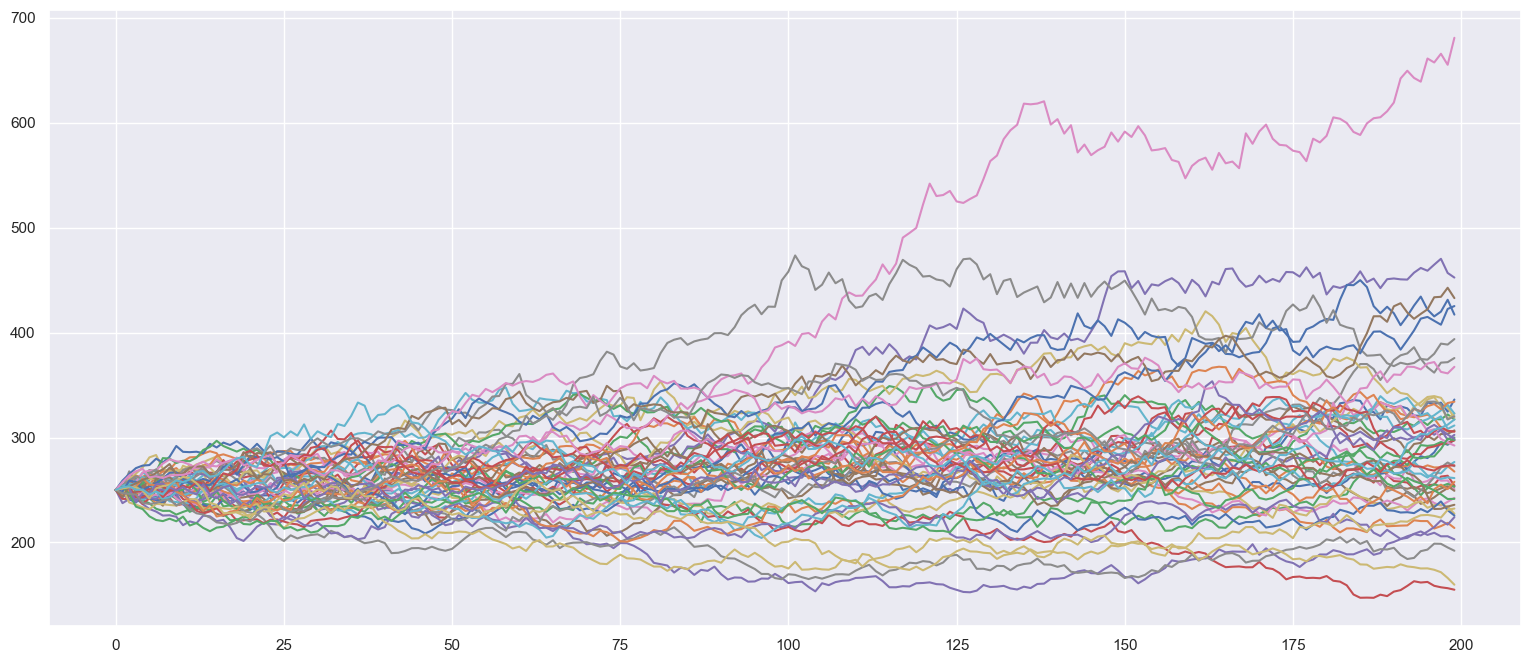

In [14]:
simulation.plot(kind = 'line', figsize = (19,8), legend= False)

Es importante identificar cual es la variable de la cual debemos validar que no este autocorrelacionada 

In [16]:
from statsmodels.stats.stattools import durbin_watson

In [18]:
durbin_watson(new_aapl['log_returns'])

np.float64(2.2177433669076274)

vemos que el coeficiente de Durbin Watson es aproximadamente 2 por lo cual decimos que los datos no esta autocorrelacionados

In [1]:

import yfinance as yf
import pandas as pd

# Selecciona el ticker de la empresa (por ejemplo, Apple: AAPL)
ticker = yf.Ticker("AAPL")

# Descargar el estado de resultados (income statement)
income_statement = ticker.financials
print("Estado de Resultados:")
print(income_statement)

# ------------------------------
# Análisis Vertical
# ------------------------------
# Se asume que se quiere expresar cada partida como % del 'Total Revenue'
if 'Total Revenue' in income_statement.index:
    vertical_analysis = income_statement.div(income_statement.loc['Total Revenue']) * 100
    print("\nAnálisis Vertical (cada partida como % del Total Revenue):")
    print(vertical_analysis)
else:
    print("\nNo se encontró la fila 'Total Revenue' en el estado de resultados. Revisa la nomenclatura de las filas.")

# ------------------------------
# Análisis Horizontal
# ------------------------------
# Calcula la variación porcentual entre periodos (columnas)
horizontal_analysis = income_statement.pct_change(axis=1) * 100
print("\nAnálisis Horizontal (% de cambio entre periodos):")
print(horizontal_analysis)


Estado de Resultados:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0  

C:\Users\dfdop\AppData\Local\Temp\ipykernel_14708\3847733689.py:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  horizontal_analysis = income_statement.pct_change(axis=1) * 100
C:\Users\dfdop\AppData\Local\Temp\ipykernel_14708\3847733689.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  horizontal_analysis = income_statement.pct_change(axis=1) * 100
